# MFA with frequency data

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from scientisttools import load_mortality
mortality = load_mortality()
mortality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, Accidental poisoning to Viral hepatitis
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   15-24 (79)        62 non-null     int32
 1   25-34 (79)        62 non-null     int32
 2   35-44 (79)        62 non-null     int32
 3   45-54 (79)        62 non-null     int32
 4   55-64 (79)        62 non-null     int32
 5   65-74 (79)        62 non-null     int32
 6   75-84 (79)        62 non-null     int32
 7   85-94 (79)        62 non-null     int32
 8   95 and more (79)  62 non-null     int32
 9   15-24 (06)        62 non-null     int32
 10  25-34 (06)        62 non-null     int32
 11  35-44 (06)        62 non-null     int32
 12  45-54 (06)        62 non-null     int32
 13  55-64 (06)        62 non-null     int32
 14  65-74 (06)        62 non-null     int32
 15  75-84 (06)        62 non-null     int32
 16  85-94 (06)        62 non-null     int32
 17  95 and mor

In [3]:
import pandas as pd
from scientisttools import MFACT
mortality2 = mortality.copy()
mortality2.columns = [x + "-2" for x in mortality2.columns]
dat = pd.concat((mortality,mortality2),axis=1)
res_mfact = MFACT(group=[9]*4,name_group=["1979","2006","1979-2","2006-2"],num_group_sup=[2,3],row_sup=list(range(50,dat.shape[0])),parallelize=True)
res_mfact.fit(dat)

MFACT(group=[9, 9, 9, 9], name_group=['1979', '2006', '1979-2', '2006-2'],
      num_group_sup=[2, 3], parallelize=True,
      row_sup=[50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

## Eigenvalues plot

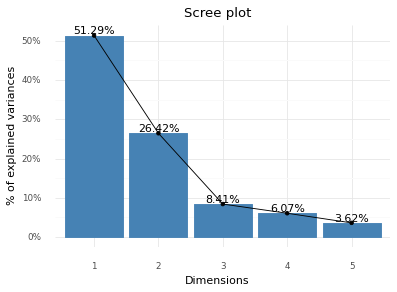

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mfact,add_labels=True)
print(p)

## Individuals Factor Map

### Color by RGB color

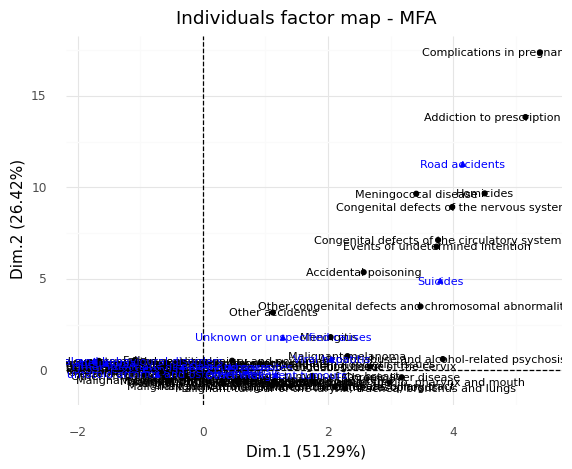

In [5]:
from scientisttools import fviz_mfa_ind
p = fviz_mfa_ind(res_mfact,repel=False,quali_sup=False)
print(p)

### Color by cos2

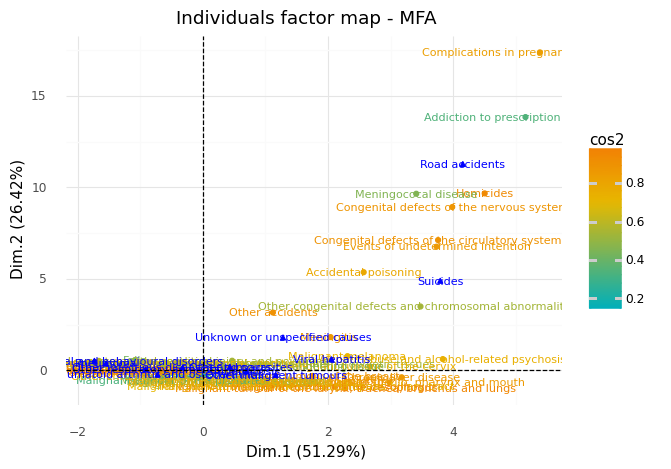

In [6]:
# Color by square cosinus
p = fviz_mfa_ind(res_mfact,color="cos2",repel=False,quali_sup=False)
print(p)

### Color by contrib

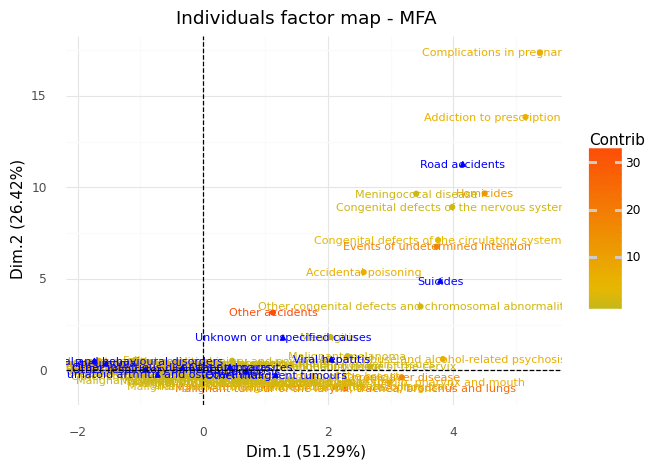

In [7]:
# Color by contrib
p = fviz_mfa_ind(res_mfact,color="contrib",repel=False,quali_sup=False)
print(p)

### Color by numpy array

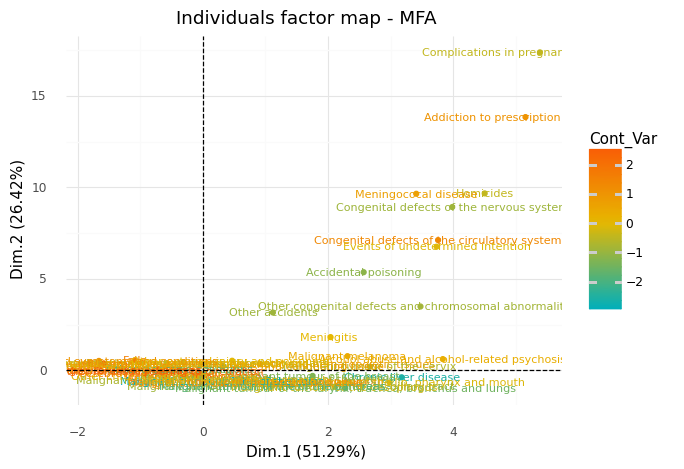

In [8]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfact.ind_["coord"].shape[0])
p = fviz_mfa_ind(res_mfact,color=color_numpy,quali_sup=False,ind_sup=False)
print(p)

### Color by kmeans cluster

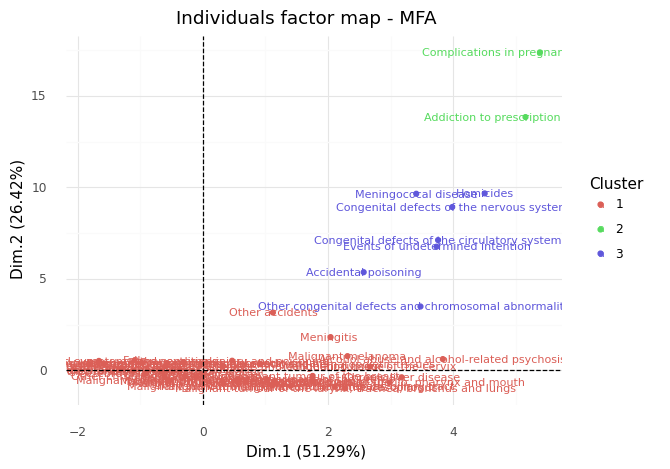

In [9]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfact.ind_["coord"])
p = fviz_mfa_ind(res_mfact,color=kmeans,repel=False,quali_sup=False,ind_sup=False)
print(p)

### Set limits

#### limiti cos2

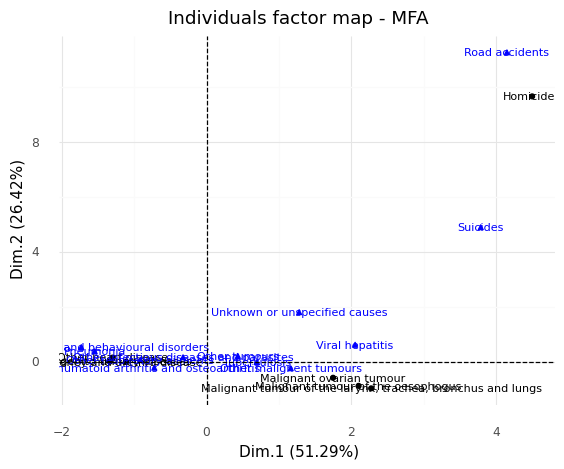

In [10]:
p = fviz_mfa_ind(res_mfact,lim_cos2=0.90,repel=False,ind_sup=True,quali_sup=False)
print(p)

### limit contrib

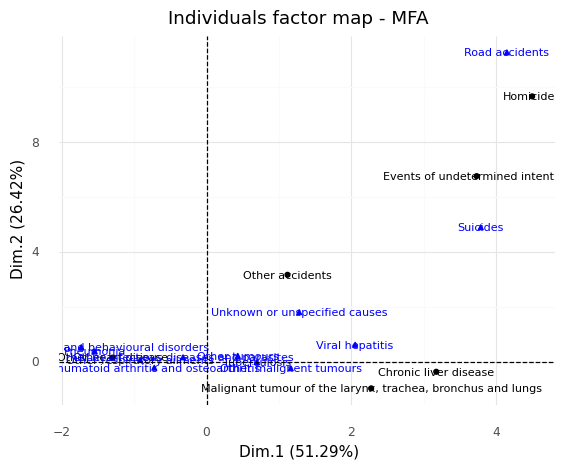

In [11]:
p = fviz_mfa_ind(res_mfact,lim_contrib=10,repel=False,ind_sup=True,quali_sup=False)
print(p)

## Frequency plot

### Color by RGB color

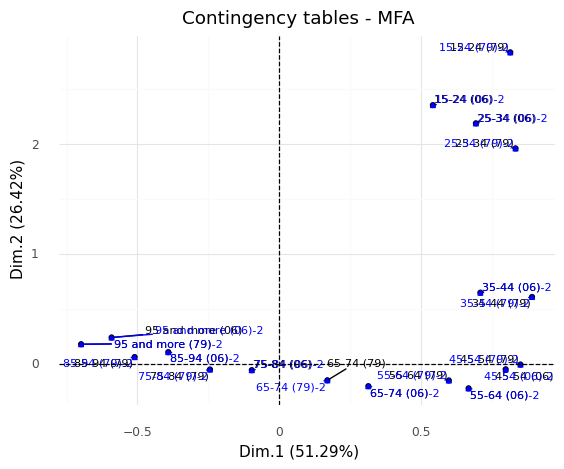

In [12]:
from scientisttools import fviz_mfa_freq
p = fviz_mfa_freq(res_mfact,freq_sup=True,repel=True)
print(p)

### Color by cos2

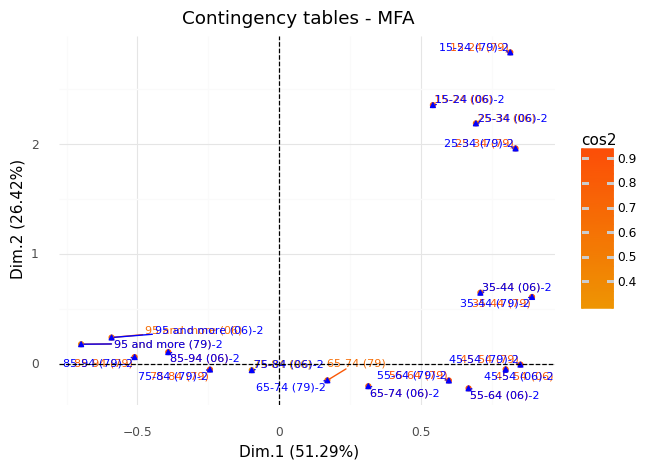

In [13]:
p = fviz_mfa_freq(res_mfact,color="cos2",freq_sup=True,repel=True)
print(p)

### Color by contrib

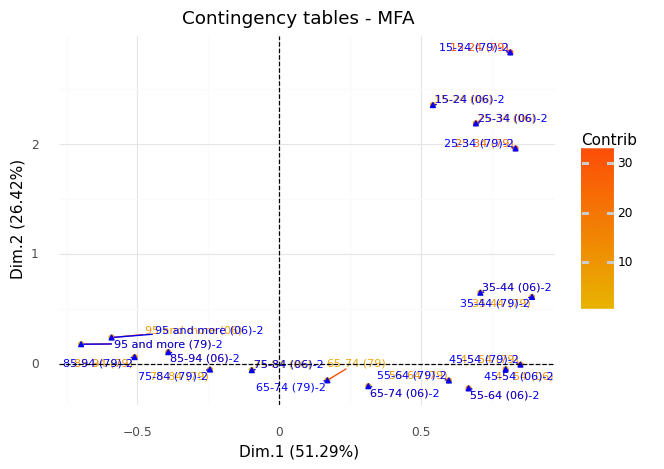

In [14]:
p = fviz_mfa_freq(res_mfact,color="contrib",freq_sup=True,repel=True)
print(p)

### Color by group

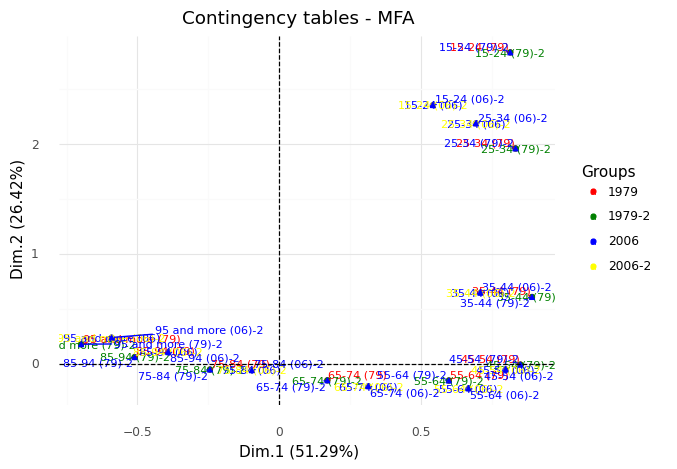

In [15]:
import plotnine as pn
p = (fviz_mfa_freq(res_mfact,freq_sup=True,color="group",repel=True)+
     pn.scale_color_manual(values=["red","green","blue","yellow"]))
print(p)

### Color by numpy array

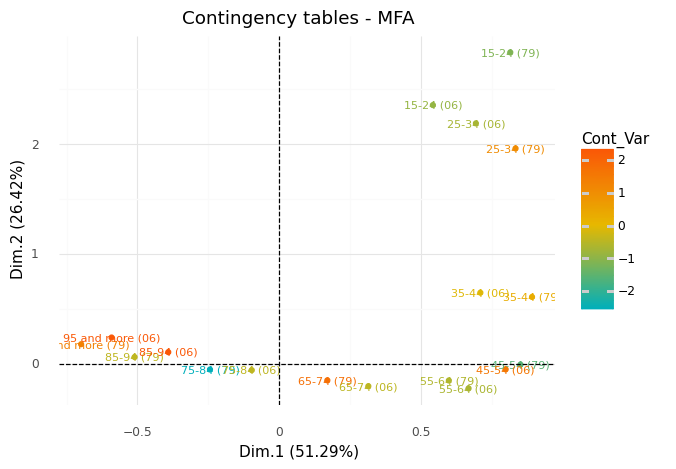

In [16]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfact.freq_["coord"].shape[0])
p = fviz_mfa_freq(res_mfact,color=color_numpy,freq_sup=False)
print(p)

### Color by kmeans

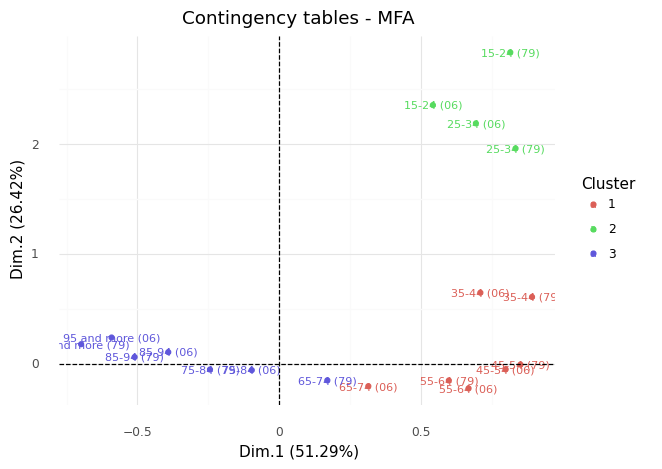

In [17]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfact.freq_["coord"])
p = fviz_mfa_freq(res_mfact,color=kmeans,freq_sup=False)
print(p)

### Set limit

#### limit cos2

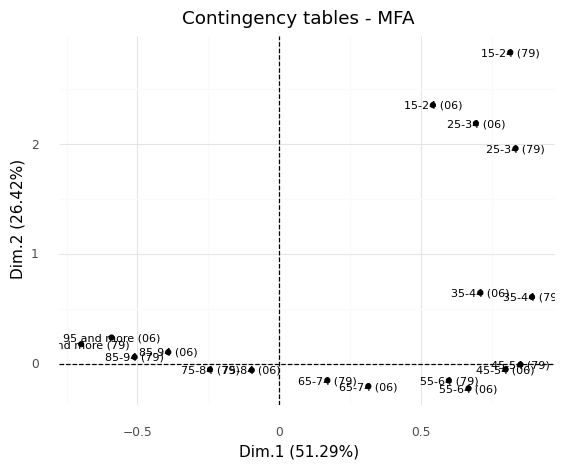

In [18]:
p = fviz_mfa_freq(res_mfact,lim_cos2=0.3,freq_sup=False)
print(p)

#### limit contrib

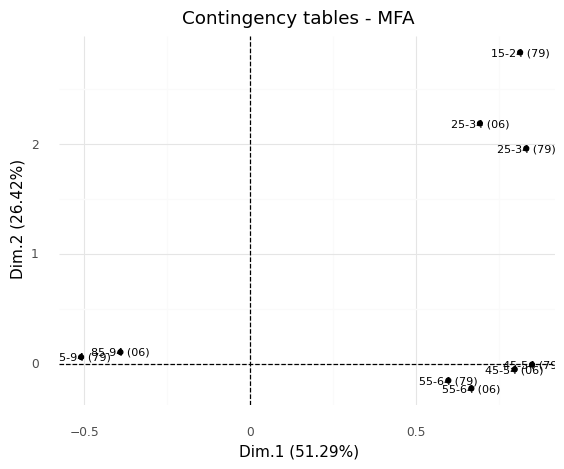

In [19]:
p = fviz_mfa_freq(res_mfact,lim_contrib=10,freq_sup=False)
print(p)

### Partial axes

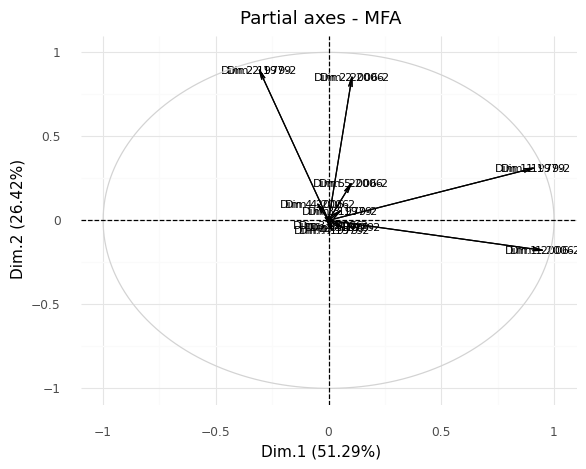

In [20]:
from scientisttools import fviz_mfa_axes
p = fviz_mfa_axes(res_mfact,color="black")
print(p)

### Color by group

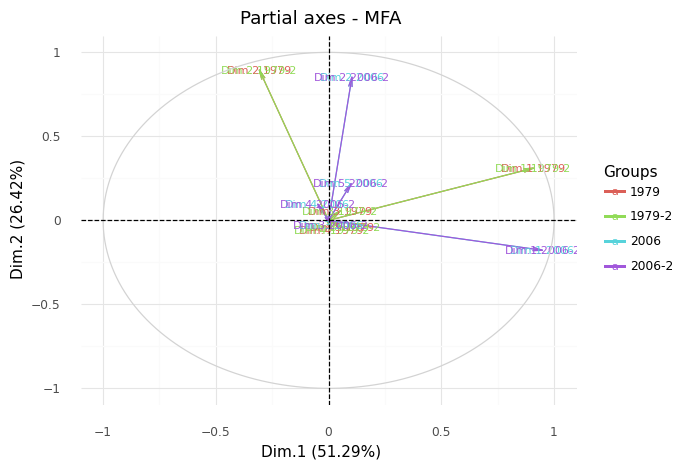

In [21]:
p = fviz_mfa_axes(res_mfact)
print(p)

## Variables groups

### Color by RGB color

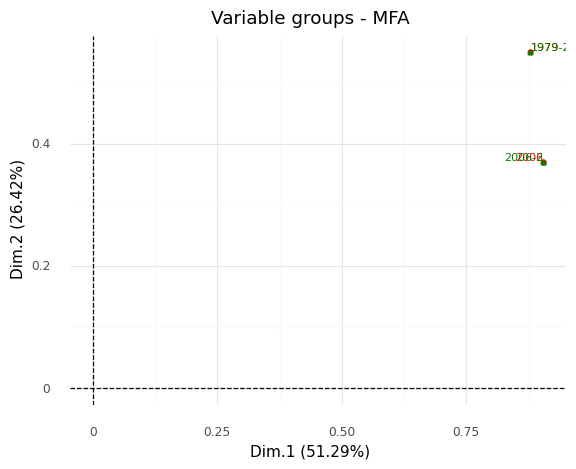

In [22]:
from scientisttools import fviz_mfa_group
p = fviz_mfa_group(res_mfact,repel=True)
print(p)

### Color by cos2

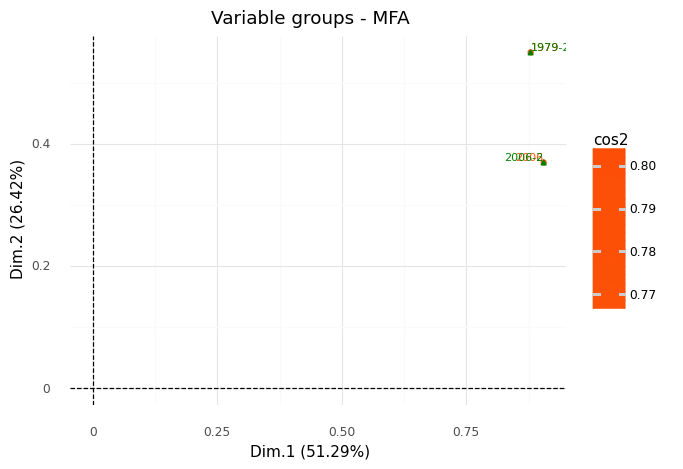

In [23]:
p = fviz_mfa_group(res_mfact,color="cos2",repel=True)
print(p)

### Color by contrib

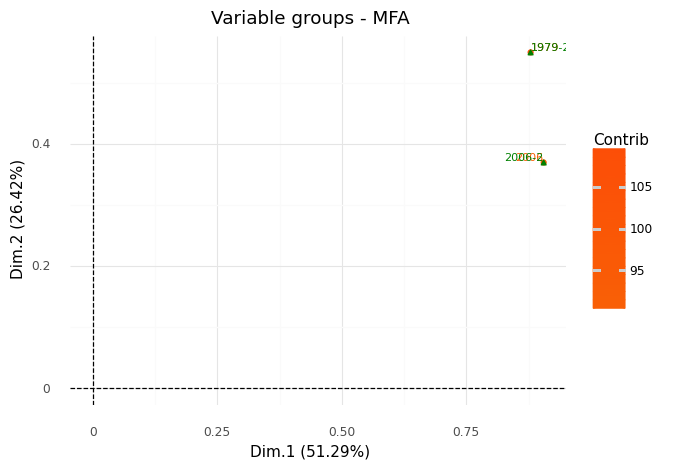

In [24]:
p = fviz_mfa_group(res_mfact,color="contrib",repel=True)
print(p)

### Color by numpy array

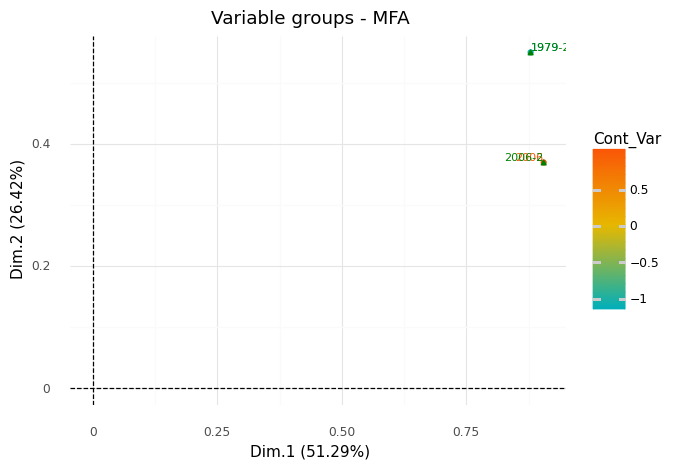

In [25]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfact.group_["coord"].shape[0])
p = fviz_mfa_group(res_mfact,color=color_numpy,repel=True)
print(p)

### Color by kmeans

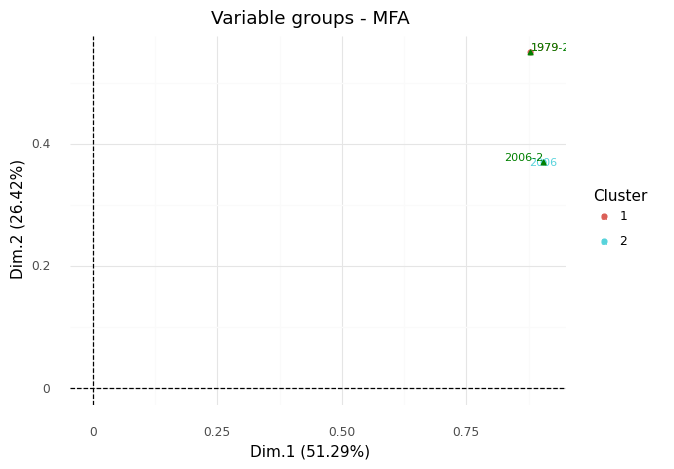

In [26]:
kmeans = KMeans(n_clusters=2, random_state=np.random.seed(123), n_init="auto").fit(res_mfact.group_["coord"])
p = fviz_mfa_group(res_mfact,color=kmeans,repel=True)
print(p)

## Plot contrib

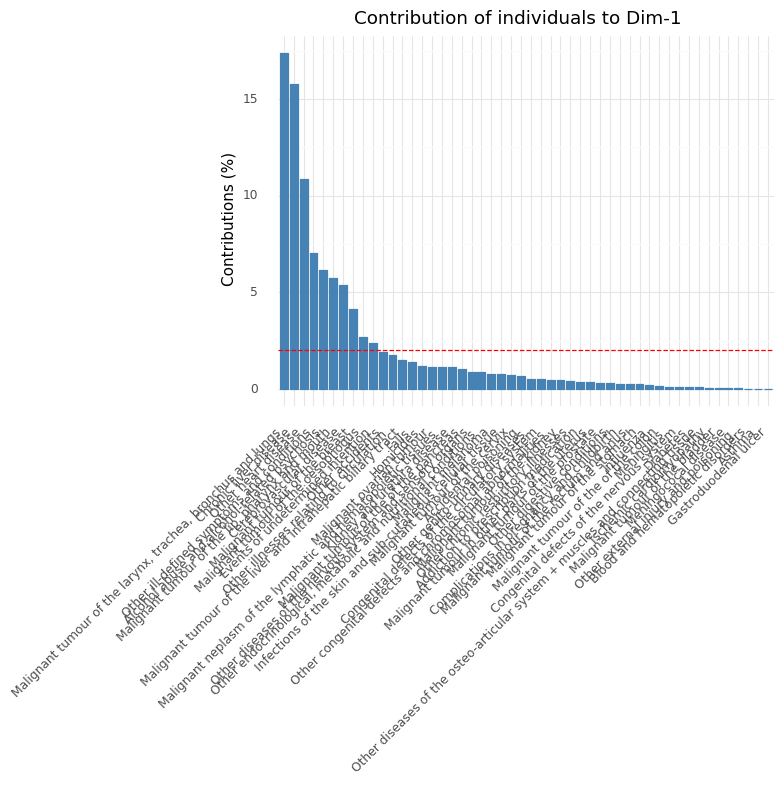

In [27]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_mfact,choice="ind")
print(p)

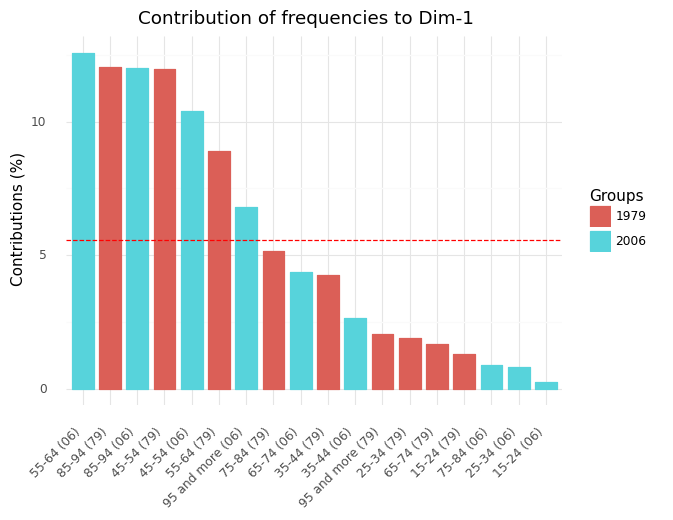

In [28]:
p = fviz_contrib(res_mfact,choice="freq")
print(p)

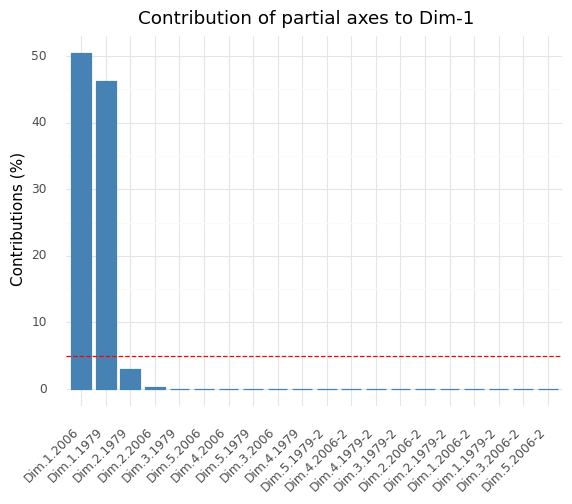

In [29]:
p = fviz_contrib(res_mfact,choice="partial_axes")
print(p)